Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.7Y6F7Y_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.7Y6F7Y_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Epoch 1/10
1563/1563 [==============================] - 183s 116ms/step - loss: 1.6675 - accuracy: 0.3853 - val_loss: 1.3526 - val_accuracy: 0.5183
Epoch 2/10
1563/1563 [==============================] - 172s 110ms/step - loss: 1.2967 - accuracy: 0.5383 - val_loss: 1.1423 - val_accuracy: 0.5948
Epoch 3/10
1563/1563 [==============================] - 172s 110ms/step - loss: 1.1226 - accuracy: 0.6081 - val_loss: 1.0205 - val_accuracy: 0.6371
Epoch 4/10
1563/1563 [==============================] - 172s 110ms/step - loss: 1.0109 - accuracy: 0.6477 - val_loss: 0.9147 - val_accuracy: 0.6837
Epoch 5/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.9357 - accuracy: 0.6721 - val_loss: 0.8873 - val_accuracy: 0.6915
Epoch 6/10
1563/1563 [==============================] - 171s 109ms/step - loss: 0.8766 - accuracy: 0.6924 - val_loss: 0.8587 - val_accura

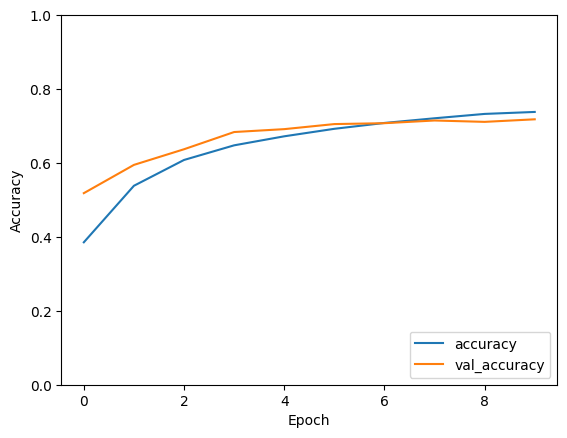

In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load CIFAR-10 dataset
(dataset_train, dataset_test), info = tfds.load('cifar10', split=['train', 'test'], with_info=True, as_supervised=True)

# Function to preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, (48, 48))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing to the datasets
train_dataset = dataset_train.map(preprocess).batch(32).prefetch(1)
test_dataset = dataset_test.map(preprocess).batch(32).prefetch(1)

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
y_true = []
y_pred = []
for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred, target_names=info.features['label'].names))
print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
